# <center> <span style="font-family: Virgil GS, sans-serif; color:#97f788">Neural Networks</span> </center>
## <center> <span style="font-family: Virgil GS, sans-serif; color:navyblue">Back-propagation</span> </center>

<span style="font-family: Virgil GS, sans-serif; color:navyblue">Author: <a href="https://github.com/deburky" title="GitHub link">https://github.com/deburky</a></span>

A custom implementation of back-propagation with NumPy.

### Datasets

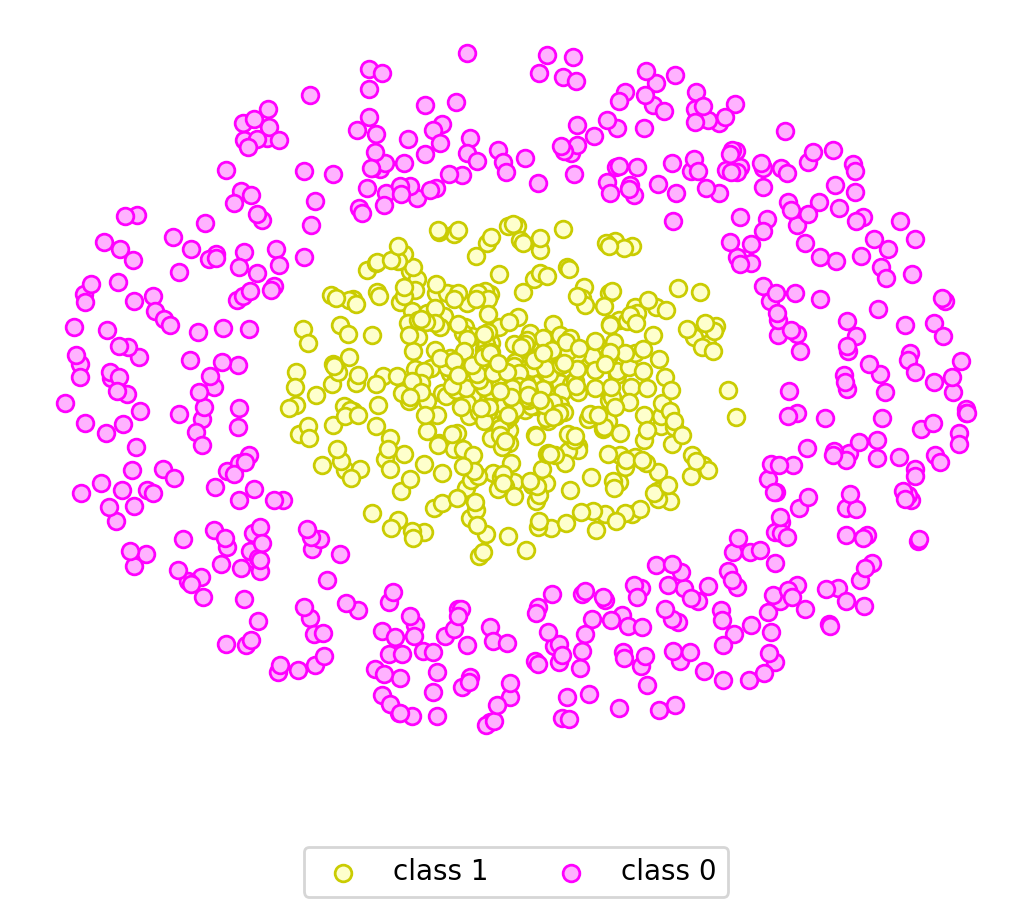

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math
np.random.seed(0)

cmap_name = 'spring'
color_map = plt.colormaps[cmap_name]
colors_class_0_edge = plt.get_cmap(color_map)(0)
colors_class_0 = '#ffb2ff'
colors_class_1_edge = '#cacc01'
colors_class_1 = '#feffcc'

def generate_dataset(N_points):
    # 1 class
    radiuses = np.random.uniform(0, 0.5, size=N_points//2)
    angles = np.random.uniform(0, 2*math.pi, size=N_points//2)
    
    x_1 = np.multiply(radiuses, np.cos(angles)).reshape(N_points//2, 1)
    x_2 = np.multiply(radiuses, np.sin(angles)).reshape(N_points//2, 1)
    X_class_1 = np.concatenate((x_1, x_2), axis=1)
    Y_class_1 = np.full((N_points//2,), 1)
        
    # 0 class
    radiuses = np.random.uniform(0.6, 1, size=N_points//2)
    angles = np.random.uniform(0, 2*math.pi, size=N_points//2)
    
    x_1 = np.multiply(radiuses, np.cos(angles)).reshape(N_points//2, 1)
    x_2 = np.multiply(radiuses, np.sin(angles)).reshape(N_points//2, 1)
    X_class_0 = np.concatenate((x_1, x_2), axis=1)
    Y_class_0 = np.full((N_points//2,), 0)
        
    X = np.concatenate((X_class_1, X_class_0), axis=0)
    Y = np.concatenate((Y_class_1, Y_class_0), axis=0)
    return X, Y
    
N_points = 1000
X_train, y_train = generate_dataset(N_points)
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color=colors_class_1, edgecolor=colors_class_1_edge, label='class 1')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color=colors_class_0, edgecolor=colors_class_0_edge, label='class 0')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.axis("off")
plt.show()

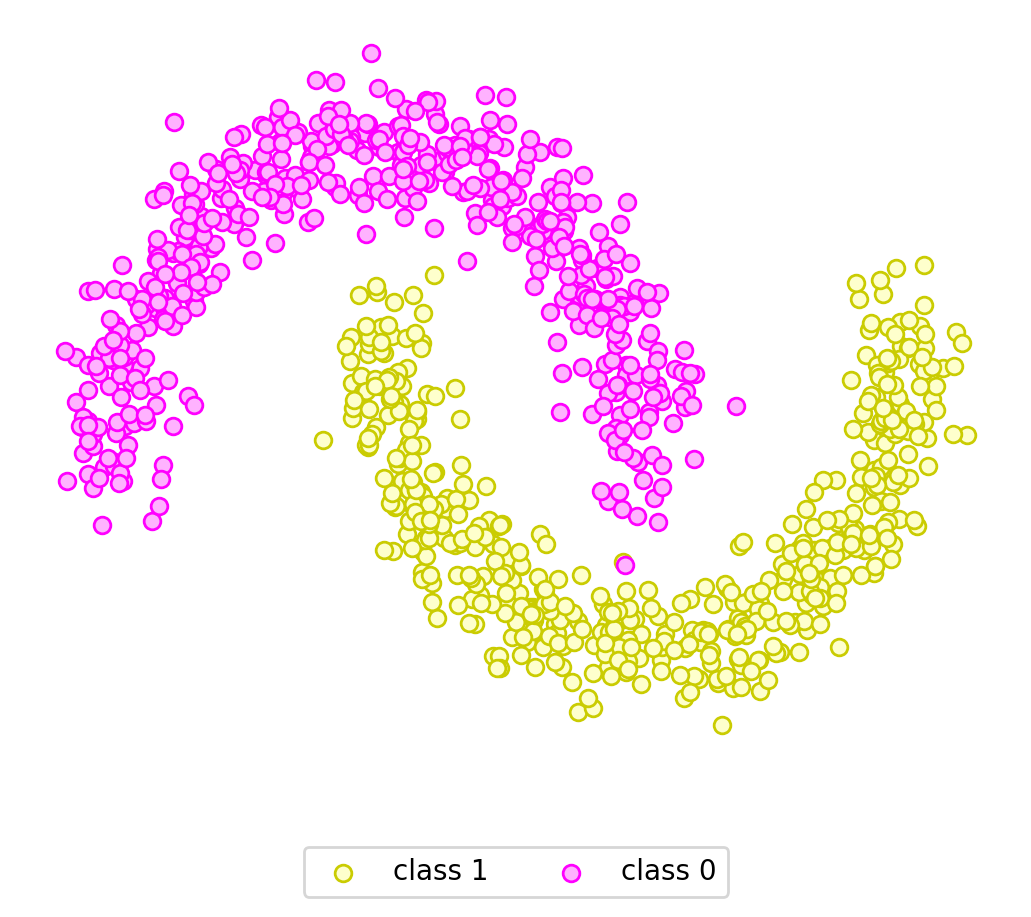

In [24]:
### Generate moons dataset for binary classification
from sklearn.datasets import make_moons

N_points = 1000
X_train, y_train = make_moons(n_samples=N_points, noise=0.1, random_state=0)

fig = plt.figure()
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color=colors_class_1, edgecolor=colors_class_1_edge, label='class 1')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color=colors_class_0, edgecolor=colors_class_0_edge, label='class 0')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.axis("off")
plt.show()

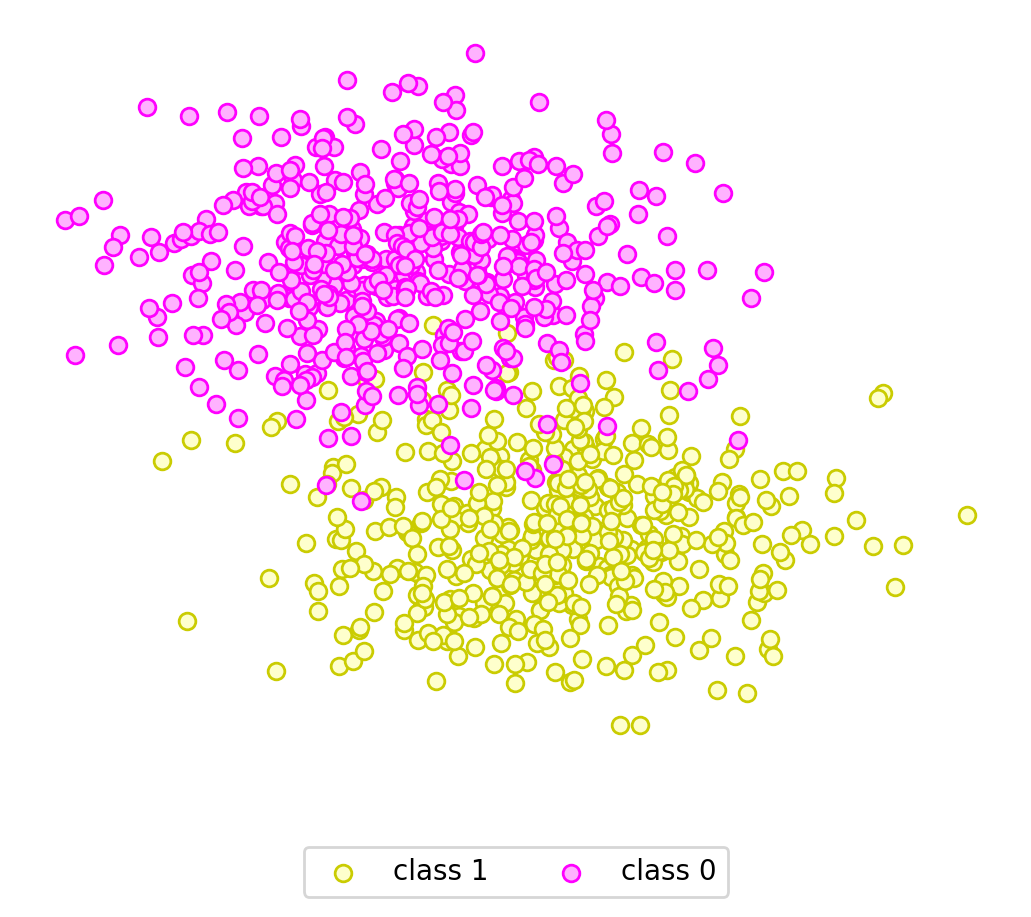

In [29]:
# generate linearly separable dataset with two blobs
from sklearn.datasets import make_blobs

N_points = 1000
X_train, y_train = make_blobs(n_samples=N_points, centers=2, n_features=2, random_state=0) # type: ignore

fig = plt.figure()
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color=colors_class_1, edgecolor=colors_class_1_edge, label='class 1')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color=colors_class_0, edgecolor=colors_class_0_edge, label='class 0')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.axis("off")
plt.show()

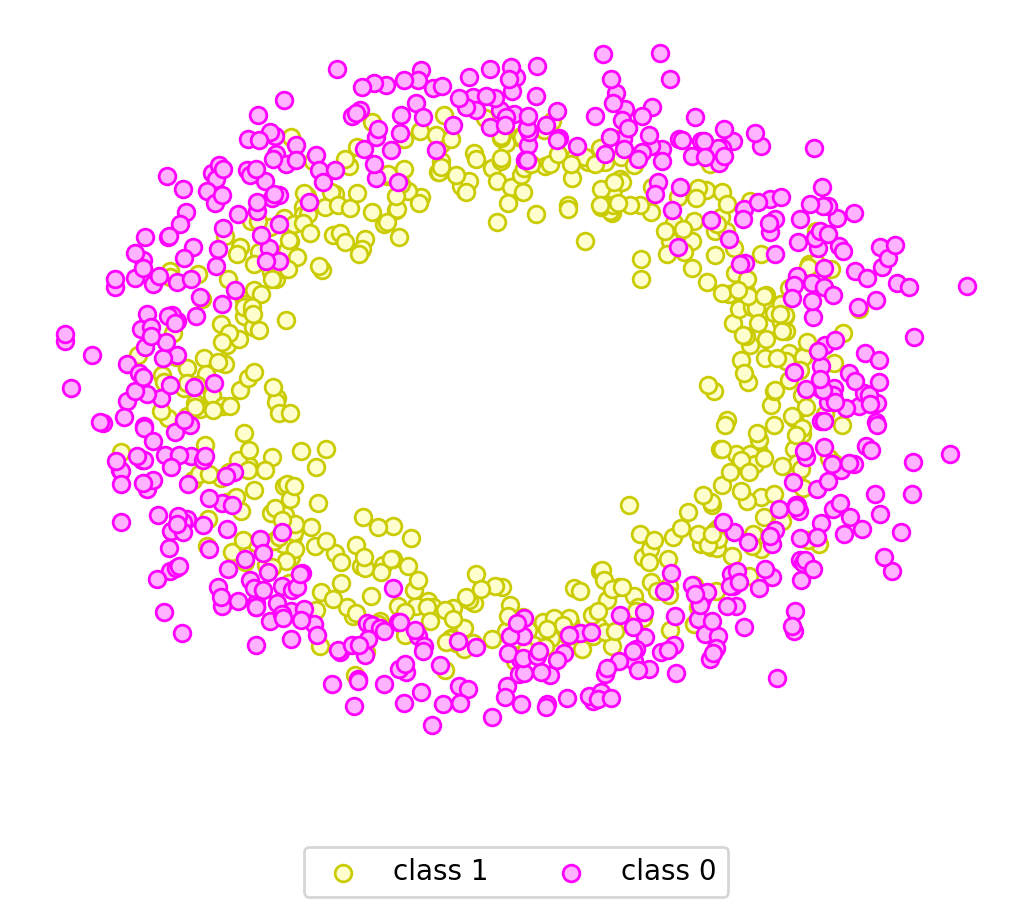

In [27]:
# generate some weird dataset for binary classification
from sklearn.datasets import make_circles

N_points = 1000
X_train, y_train = make_circles(n_samples=N_points, noise=0.1, random_state=0)

fig = plt.figure()
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color=colors_class_1, edgecolor=colors_class_1_edge, label='class 1')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color=colors_class_0, edgecolor=colors_class_0_edge, label='class 0')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.axis("off")
plt.show()

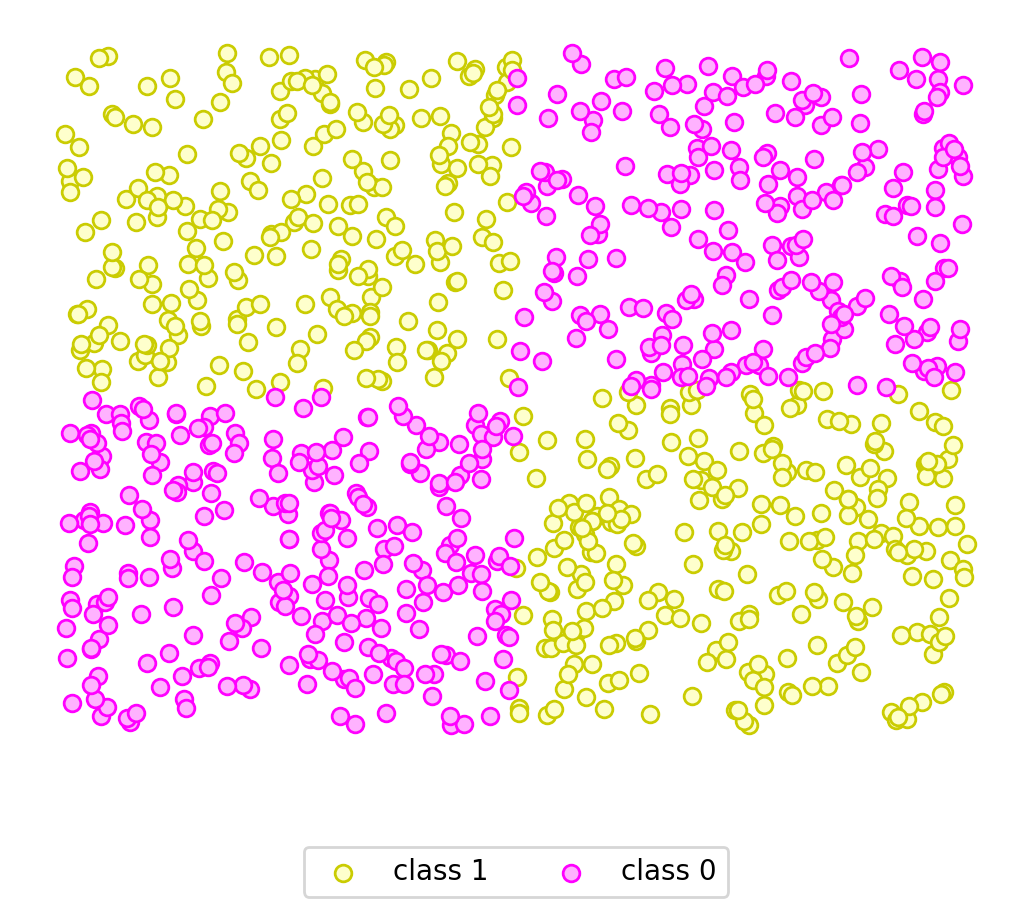

In [28]:
# create XOR dataset

N_points = 1000
X_train = np.random.uniform(-1, 1, size=(N_points, 2))
y_train = np.logical_xor(X_train[:, 0] > 0, X_train[:, 1] > 0).astype(int)

fig = plt.figure()
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color=colors_class_1, edgecolor=colors_class_1_edge, label='class 1')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color=colors_class_0, edgecolor=colors_class_0_edge, label='class 0')
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.axis("off")
plt.show()

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.datasets import make_moons, make_blobs, make_circles

# Set the random seed for reproducibility
np.random.seed(0)

# Define the colormap and colors for the plot
cmap_name = 'spring'
color_map = plt.colormaps[cmap_name]
colors_class_0_edge = plt.get_cmap(color_map)(0)
colors_class_0 = '#ffb2ff'
colors_class_1_edge = '#cacc01'
colors_class_1 = '#feffcc'

def generate_custom_dataset(N_points):
    # Class 1
    radiuses = np.random.uniform(0, 0.5, size=N_points//2)
    angles = np.random.uniform(0, 2*math.pi, size=N_points//2)
    
    x_1 = np.multiply(radiuses, np.cos(angles)).reshape(N_points//2, 1)
    x_2 = np.multiply(radiuses, np.sin(angles)).reshape(N_points//2, 1)
    X_class_1 = np.concatenate((x_1, x_2), axis=1)
    Y_class_1 = np.full((N_points//2,), 1)
        
    # Class 0
    radiuses = np.random.uniform(0.6, 1, size=N_points//2)
    angles = np.random.uniform(0, 2*math.pi, size=N_points//2)
    
    x_1 = np.multiply(radiuses, np.cos(angles)).reshape(N_points//2, 1)
    x_2 = np.multiply(radiuses, np.sin(angles)).reshape(N_points//2, 1)
    X_class_0 = np.concatenate((x_1, x_2), axis=1)
    Y_class_0 = np.full((N_points//2,), 0)
        
    X = np.concatenate((X_class_1, X_class_0), axis=0)
    Y = np.concatenate((Y_class_1, Y_class_0), axis=0)
    return X, Y

def generate_dataset(name='custom', N_points=1000):
    if name == 'moons':
        X, Y = make_moons(n_samples=N_points, noise=0.1, random_state=0)
    elif name == 'blobs':
        X, Y = make_blobs(n_samples=N_points, centers=2, n_features=2, random_state=0) # type: ignore
    elif name == 'circles':
        X, Y = make_circles(n_samples=N_points, noise=0.1, random_state=0)
    elif name == 'xor':
        X = np.random.uniform(-1, 1, size=(N_points, 2))
        Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
    else:
        X, Y = generate_custom_dataset(N_points)
    return X, Y

def plot_dataset(X, Y):
    plt.scatter(X[Y == 1, 0], X[Y == 1, 1], color=colors_class_1, edgecolor=colors_class_1_edge, label='class 1')
    plt.scatter(X[Y == 0, 0], X[Y == 0, 1], color=colors_class_0, edgecolor=colors_class_0_edge, label='class 0')
    plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
    plt.axis("off")
    plt.show()

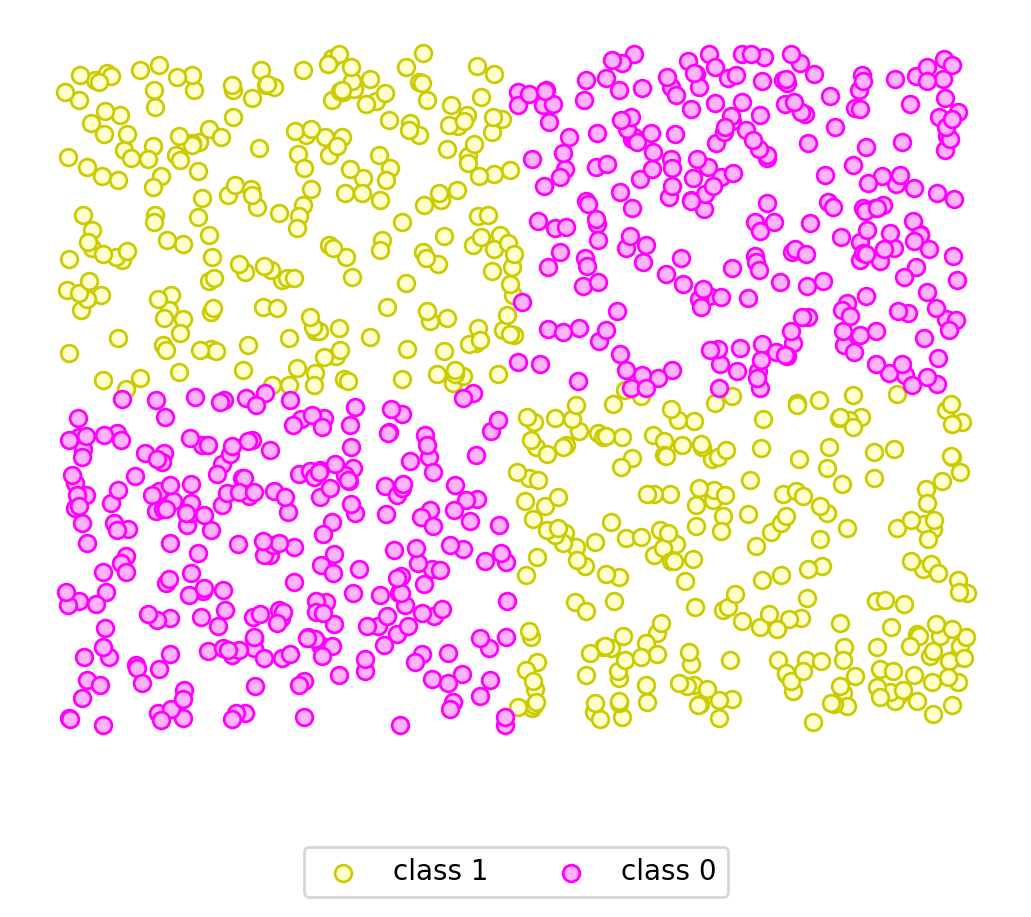

In [84]:
# X_train, y_train = generate_dataset(name='moons', N_points=1000)
# plot_dataset(X_train, y_train)

# X_train, y_train = generate_dataset(name='blobs', N_points=1000)
# plot_dataset(X_train, y_train)

# X_train, y_train = generate_dataset(name='circles', N_points=1000)
# plot_dataset(X_train, y_train)

X_train, y_train = generate_dataset(name='xor', N_points=1000)
plot_dataset(X_train, y_train)

# X_train, y_train = generate_dataset(name='custom', N_points=1000)
# plot_dataset(X_train, y_train)

### Neural network

In [85]:
import numpy as np

cmap_name = 'spring'
color_map = plt.colormaps[cmap_name]
colors_class_0_edge = plt.get_cmap(color_map)(0)
colors_class_0 = '#ffb2ff'
colors_class_1_edge = '#cacc01'
colors_class_1 = '#feffcc'

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def leaky_relu(x, alpha=1e-2):
    return np.where(x > 0, x, x * alpha)

def leaky_relu_derivative(x, alpha=1e-2):
    return np.where(x > 0, 1, alpha)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1.0 - np.tanh(x)**2

def forward_pass(X, weights, activation: str = 'sigmoid'):
    # Perform a forward pass
    Z1 = np.dot(X, weights['W1'].T) + weights['b1']
    if activation == 'sigmoid':
        H = sigmoid(Z1)
    elif activation == 'relu':
        H = relu(Z1)
    elif activation == 'leaky_relu':
        H = leaky_relu(Z1)
    else:
        H = tanh(Z1)
    Z2 = np.dot(H, weights['W2'].T) + weights['b2']
    Y = sigmoid(Z2)
    return np.clip(Y, 1e-10, 1 - 1e-10), Z2, H, Z1

def back_propagation(X, Y_T, weights, activation='sigmoid'):
    N_points = X.shape[0]
    # Forward pass
    Y, Z2, H, Z1 = forward_pass(X, weights, activation='sigmoid')
    L = (1 / N_points) * np.sum(-Y_T * np.log(Y) - (1 - Y_T) * np.log(1 - Y))
    # Back propagation
    dLdY = 1 / N_points * np.divide(Y - Y_T, np.multiply(Y, 1 - Y))
    dLdZ2 = np.multiply(dLdY, np.multiply(sigmoid(Z2), (1-sigmoid(Z2))))
    dLdW2 = np.dot(H.T, dLdZ2)
    dLdb2 = np.dot(dLdZ2.T, np.ones(N_points))
    dLdH = np.dot(dLdZ2.reshape(N_points, 1), weights['W2'].reshape(1, 3))
    if activation == 'relu':
        dLdZ1 = dLdH * relu_derivative(Z1)
    elif activation == 'leaky_relu':
        dLdZ1 = dLdH * leaky_relu_derivative(Z1)
    elif activation == 'tanh':
        dLdZ1 = dLdH * tanh_derivative(Z1)
    else:
        dLdZ1 = dLdH * sigmoid_derivative(Z1)
    dLdW1 = np.dot(dLdZ1.T, X)
    dLdb1 = np.dot(dLdZ1.T, np.ones(N_points))
    
    gradients = {
        'W1': dLdW1,
        'b1': dLdb1,
        'W2': dLdW2,
        'b2': dLdb2,
    }
    return gradients, L

def visualization(weights, X, y, title, show_points=False):
    N_test_points = len(X)
    xs = np.linspace(1.01*np.min(X), 1.01*np.max(X), N_test_points)
    datapoints = np.transpose([np.tile(xs, len(xs)), np.repeat(xs, len(xs))])
    Y_initial = forward_pass(datapoints, weights)[0].reshape(N_test_points, N_test_points)
    X1, X2 = np.meshgrid(xs, xs)
    plt.pcolormesh(X1, X2, Y_initial, cmap=cmap_name)
    plt.colorbar(label='P(+)')
    if show_points and y is not None:
        plt.scatter(
            X[y == 1, 0],
            X[y == 1, 1],
            color=colors_class_1,
            edgecolor=colors_class_1_edge,
            linewidth=1.0
        )
        plt.scatter(
            X[y == 0, 0],
            X[y == 0, 1],
            color=colors_class_0,
            edgecolor=colors_class_0_edge,
            linewidth=1.0
        ) 
    # plt.title(title)
    plt.axis('off')
    plt.show()
        

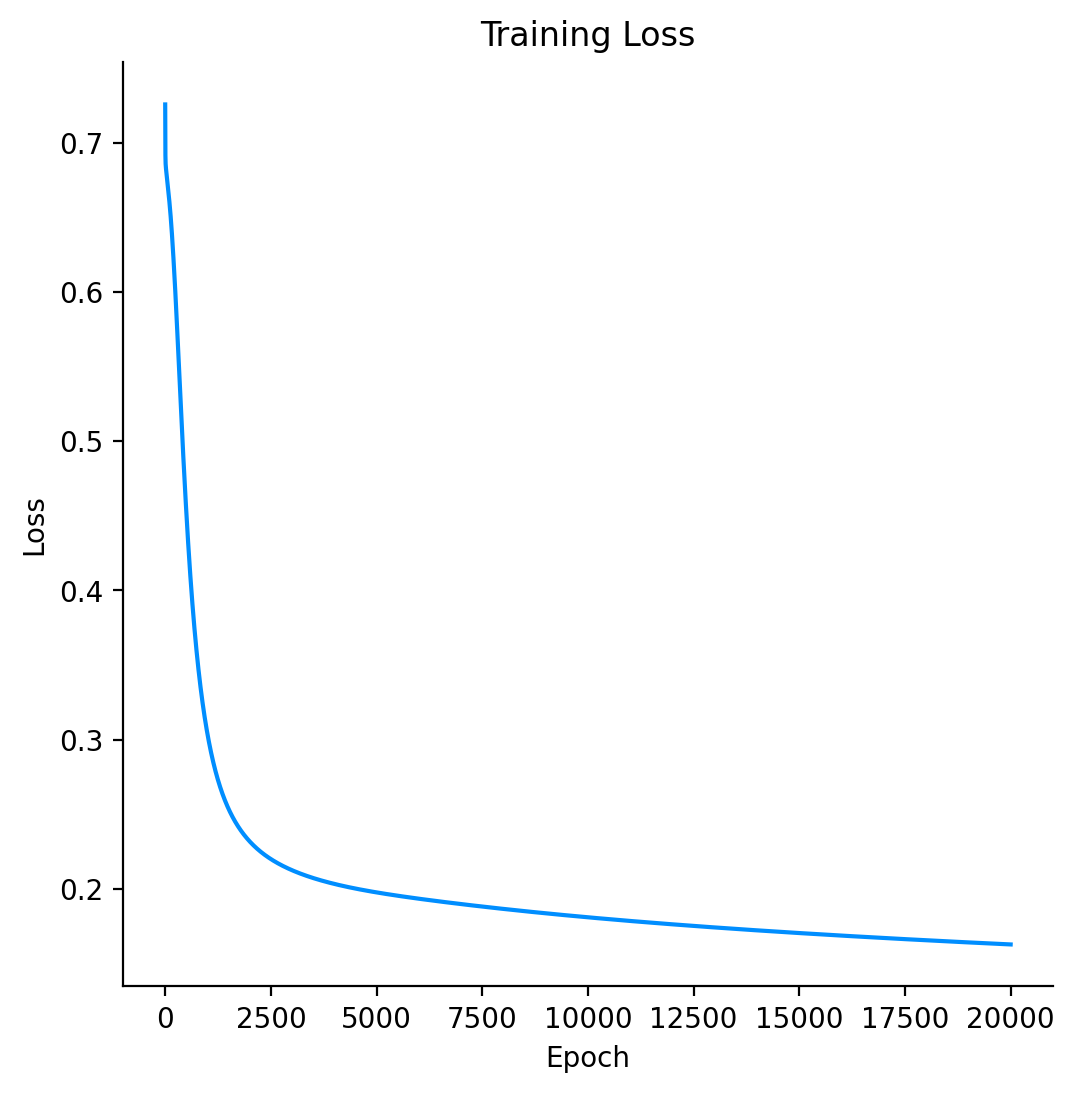

In [92]:
import numpy as np
import copy
np.random.seed(0)

# Set the hyperparameters
hidden_size, input_size = 3, 2
n_points = len(X_train)
activation = 'tanh'

epochs = 20_000
epsilon = 0.3

# Initialize weights
weights_sigmoid = {
    'W1': np.random.randn(hidden_size, input_size),
    'b1': np.ones(3),
    'W2': np.random.randn(hidden_size),
    'b2': 0,
}

weights_relu = {
    'W1': np.random.randn(hidden_size, input_size) / np.sqrt((input_size + hidden_size) / n_points),
    'b1': np.ones(hidden_size),
    'W2': np.random.randn(hidden_size) / np.sqrt(hidden_size / n_points),
    'b2': 1,
}

# Choose initial weights based on the activation function
if activation in {'sigmoid', 'tanh'}:
    weights = weights_sigmoid
elif activation in {'relu', 'leaky_relu'}:
    weights = weights_relu

initial_weights = copy.deepcopy(weights)

losses = []
for _ in range(epochs):
    gradients, L = back_propagation(X_train, y_train, weights, activation=activation)
    for weight_name in weights:
        weights[weight_name] -= epsilon * gradients[weight_name]

    losses.append(L)

fig = plt.figure(figsize=(6, 6))
plt.plot(losses, linewidth=1.5, color='#008eff')
plt.title('Training Loss')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

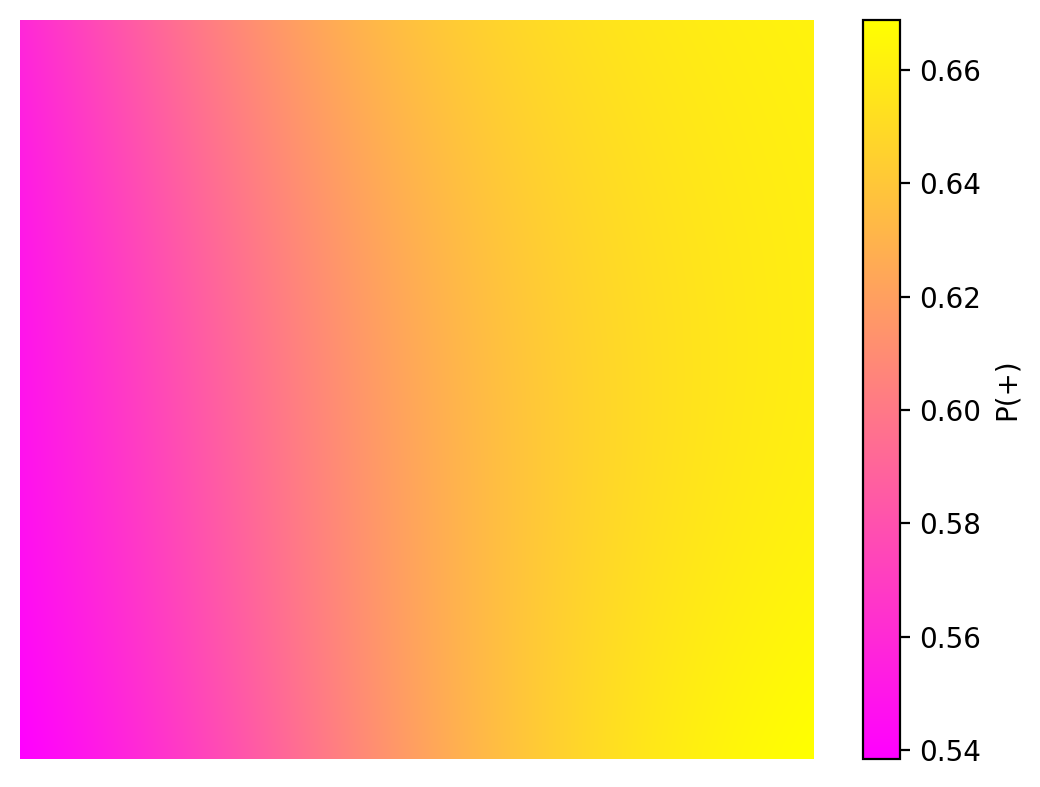

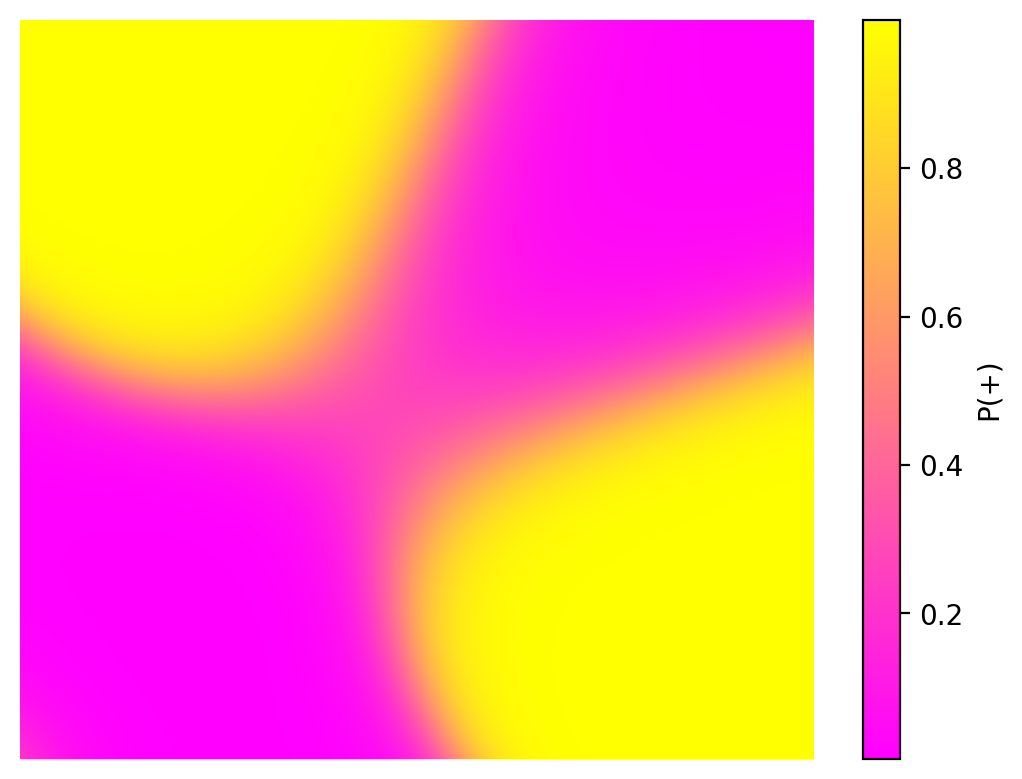

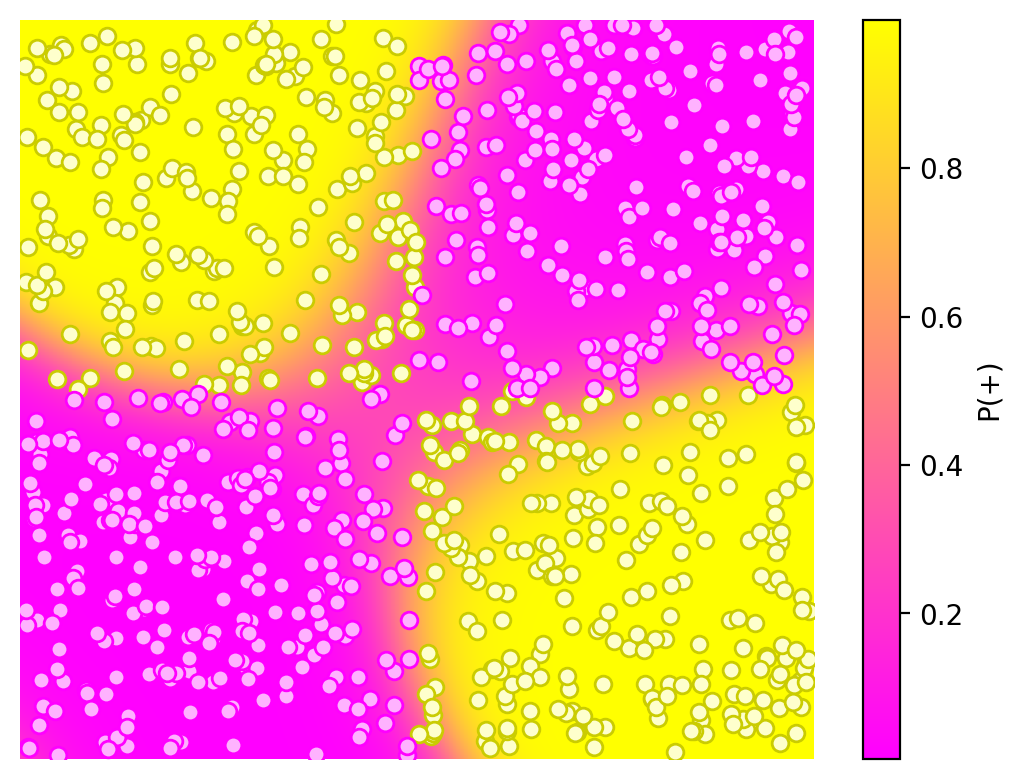

In [93]:
%config InlineBackend.figure_format = 'retina'

visualization(initial_weights, X_train, y_train, title='Visualization before learning')
visualization(weights, X_train, y_train, title='Visualization after learning')
visualization(weights, X_train, y_train, 'Visualization after learning', show_points=True)